## Задача Beltel для предсказывания продаж в 2024 году.

### Постановка задачи

$Построить\;модель\;прогнозирования\;продаж,\;которая\;учитывает\;день\;недели\;и\;акцию.$<br>
$Прогноз\;должен\;быть\;построен\;на\;январь\;2024\;года\;по\;всем\;товарам, \;которые\;участвовали\;в\;продажах\;в\;декабре\;2023.\;Разделитель\;в\;файле    \;';'.$<br>

### Предварительный анализ данных

In [288]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [289]:
df1 = pd.read_csv(r'discounts_raw.csv')
df2 = pd.read_csv(r'sales_raw.csv')

In [290]:
print('discounts_raw shape', df1.shape)
df1.head()

discounts_raw shape (2081, 6)


,item_id,promo_typeCode,sale_price_before_promo,sale_price_time_promo,date_start,date_end
0,100551,5.0,159.9,139.9,2023-03-02,2023-03-15
1,100553,5.0,159.9,139.9,2023-03-02,2023-03-15
2,100554,5.0,159.9,139.9,2023-03-02,2023-03-15
3,100558,5.0,159.9,139.9,2023-03-02,2023-03-15
4,100530,2.0,36.9,24.6,2021-09-09,2021-09-22


In [291]:
print('sales_raw shape', df2.shape)
df2.head()

sales_raw shape (147143, 3)


,date,item_id,qnty
0,2017-01-01,100001,7.0
1,2017-01-01,100003,2.0
2,2017-01-01,100006,13.0
3,2017-01-01,100010,5.0
4,2017-01-01,100035,53.0


In [292]:
df1.dtypes

item_id                      int64
promo_typeCode             float64
sale_price_before_promo    float64
sale_price_time_promo      float64
date_start                  object
date_end                    object
dtype: object

In [293]:
df2.dtypes

date        object
item_id      int64
qnty       float64
dtype: object

In [294]:
df1.describe()

,item_id,promo_typeCode,sale_price_before_promo,sale_price_time_promo
count,2081.000000,2041.000000,2081.000000,2081.000000
mean,100475.755887,6.667810,154.801394,111.052134
std,151.486922,5.424833,137.022563,107.924850
min,100045.000000,1.000000,35.800000,23.870000
25%,100375.000000,5.000000,77.900000,59.900000
50%,100523.000000,6.000000,114.900000,84.900000
75%,100601.000000,6.000000,159.900000,109.900000
max,100691.000000,44.000000,759.900000,689.900000


In [295]:
df2.describe()

,item_id,qnty
count,147143.000000,147143.000000
mean,99552.401038,8.778191
std,8819.498659,27.696091
min,11200.000000,-3.000000
25%,100257.000000,1.000000
50%,100486.000000,3.000000
75%,100601.000000,7.000000
max,100691.000000,1201.000000


In [296]:
df1.nunique()

item_id                     84
promo_typeCode              10
sale_price_before_promo    135
sale_price_time_promo      108
date_start                 264
date_end                   241
dtype: int64

In [297]:
df2.nunique()

date       2556
item_id     100
qnty        487
dtype: int64

$Из\;предварительного\;анализа\;данных\;ясно,\;что\;датасет\;содержит\;в\;себе\;данные\;object\;типа.\;$<br>
$Date\_start,\;date\_end\;и\;date\;нужно\;преобразовать\;в\;формат\;даты.$<br>

### Исследовательский анализ данных

In [298]:
df1['date_start'] = pd.to_datetime(df1['date_start'])
df1['date_end'] = pd.to_datetime(df1['date_end'])
df2['date']=pd.to_datetime(df2['date'])

In [299]:
daily_sales  = df2.resample('D', on='date')['qnty'].sum()
print(daily_sales)

date
2017-01-01    289.0
2017-01-02    278.0
2017-01-03    356.0
2017-01-04    386.0
2017-01-05    424.0
              ...  
2023-12-27    810.0
2023-12-28    926.0
2023-12-29    718.0
2023-12-30    914.0
2023-12-31    782.0
Freq: D, Name: qnty, Length: 2556, dtype: float64


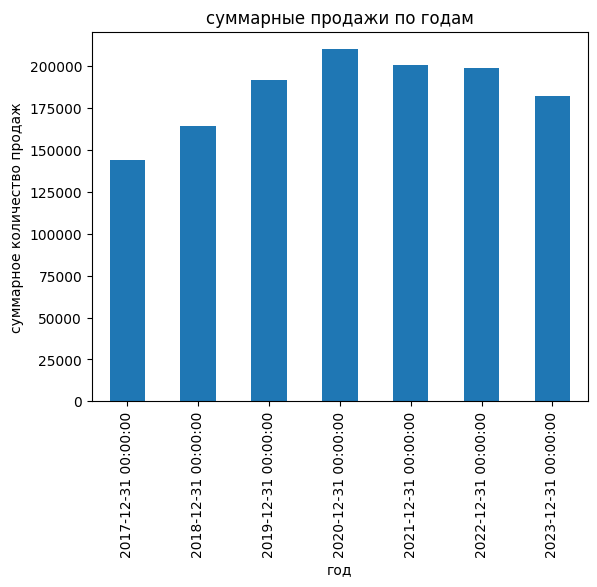

In [300]:
yearly_sales = df2.resample('YE', on='date')['qnty'].sum()
yearly_sales.head()
yearly_sales.plot(kind='bar')
plt.title('суммарные продажи по годам')
plt.xlabel('год')
plt.ylabel('суммарное количество продаж')
plt.show()

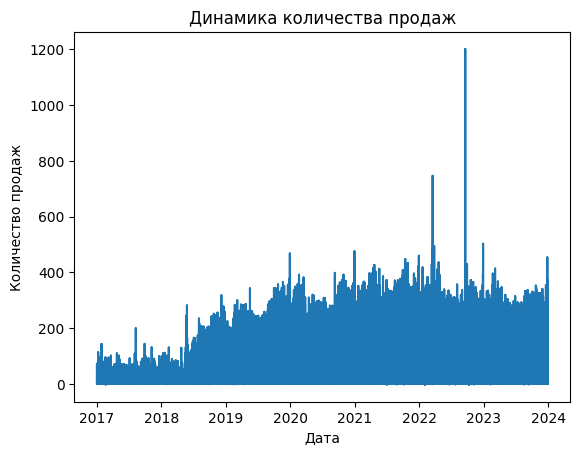

In [301]:
plt.plot(df2['date'], df2['qnty'])
plt.title('Динамика количества продаж')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.show()

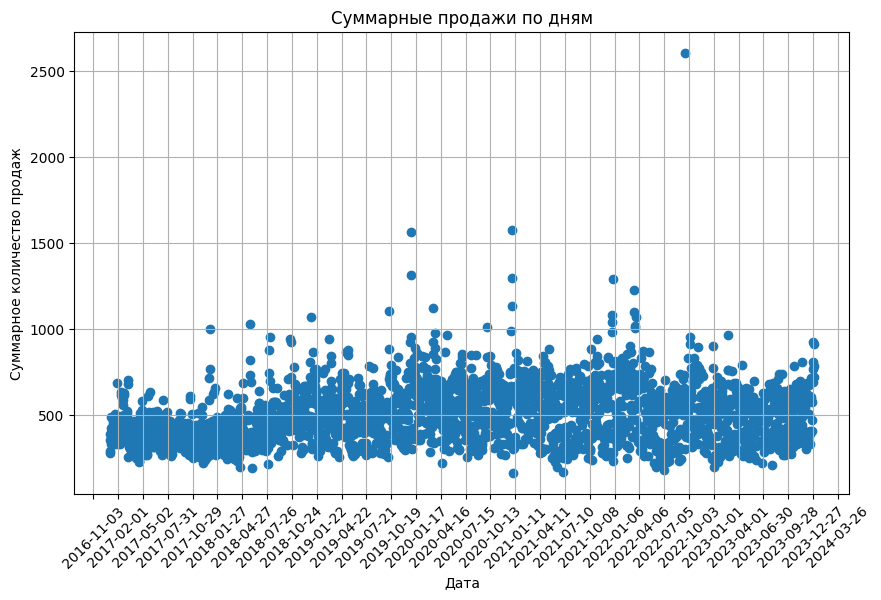

In [302]:
import matplotlib.pyplot as plt
daily_sales = df2.groupby(df2['date']).agg({'qnty':'sum'}).reset_index()

plt.figure(figsize=(10, 6))
plt.scatter(daily_sales['date'], daily_sales['qnty'])

plt.title('Суммарные продажи по дням')
plt.xlabel('Дата')
plt.ylabel('Суммарное количество продаж')
plt.grid(True)

plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.DayLocator(interval=90))
plt.xticks(rotation=45)

plt.show()


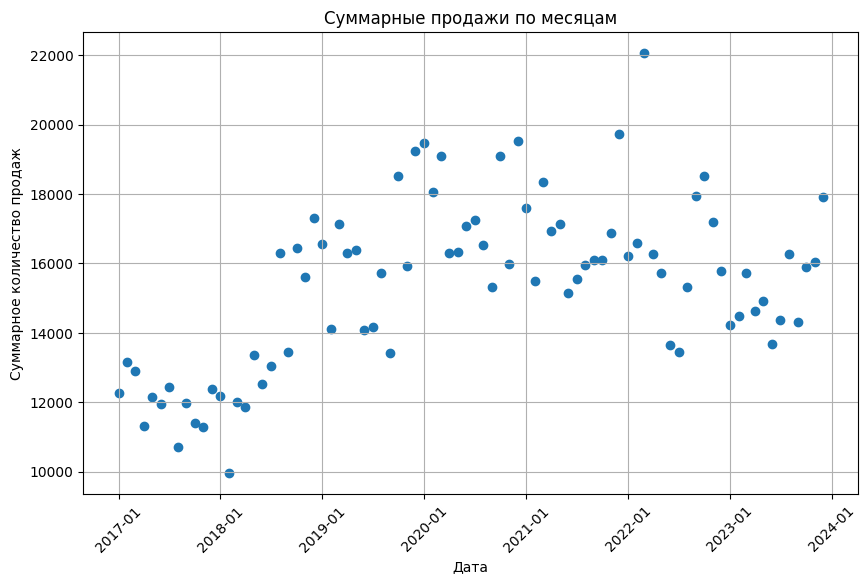

In [303]:
import matplotlib.pyplot as plt
monthly_sales = df2.groupby(df2['date'].dt.to_period('M')).agg({'qnty': 'sum'}).reset_index()

monthly_sales['date'] = monthly_sales['date'].dt.to_timestamp()

plt.figure(figsize=(10, 6))
plt.scatter(monthly_sales['date'], monthly_sales['qnty'])

plt.title('Суммарные продажи по месяцам')
plt.xlabel('Дата')
plt.ylabel('Суммарное количество продаж')
plt.grid(True)

plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m')) 
plt.xticks(rotation=45)

plt.show()


$C\;учетом\;поставленной\;задачи,\;изучим\boldsymbol\;\boldsymbol п\boldsymbol р\boldsymbol о\boldsymbol д\boldsymbol а\boldsymbol ж\boldsymbol и\boldsymbol\;\boldsymbol з\boldsymbol а\boldsymbol\;\mathbf{2023}\boldsymbol\;\boldsymbol г\boldsymbol о\boldsymbol д$<br>

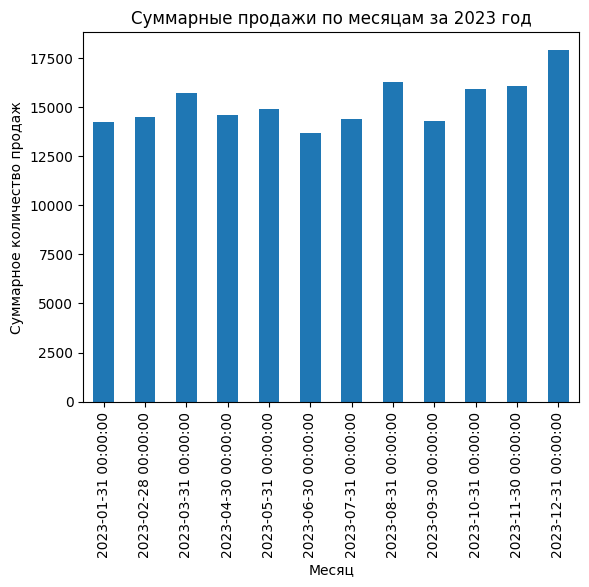

In [304]:
specific_year_sales = df2[(df2['date'] >= '2023-01-01') & (df2['date']<='2023-12-31')]
specific_year_sales = specific_year_sales.resample('ME', on='date')['qnty'].sum()
specific_year_sales.head()
specific_year_sales.plot(kind='bar')
plt.title('Суммарные продажи по месяцам за 2023 год')
plt.xlabel('Месяц')
plt.ylabel('Суммарное количество продаж')
plt.show()

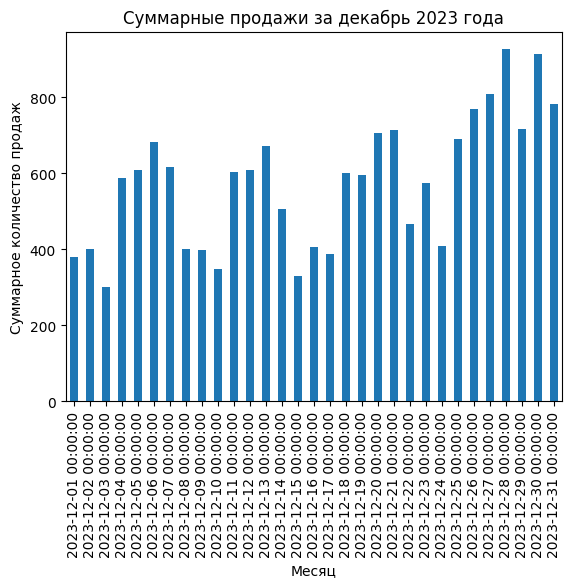

In [305]:
specific_month_sales = df2[(df2['date'] >= '2023-12-01') & (df2['date']<='2023-12-31')]
specific_month_sales = specific_month_sales .resample('D', on='date')['qnty'].sum()
specific_month_sales.head()
specific_month_sales.plot(kind='bar')
plt.title('Суммарные продажи за декабрь 2023 года')
plt.xlabel('Месяц')
plt.ylabel('Суммарное количество продаж')
plt.show()

$Из\;представленных\;графиков\;можно\;заметить,что\;продажи\;росли\;с\;2017\;по\;2022.$<br>
$С\;2022\;по\;начало\;2023\;наблюдался\;спад.$<br>
$Если\;обратиться\;к\;гистограммам\;2023\;года,\;то\;наибольшее\;количество\;продаж$<br>
$наблюдалось\;в\;декабре.$<br>

## Предобработка данных

In [306]:
duplicates = df1.duplicated()
print(duplicates.any())  
duplicates = df2.duplicated()
print(duplicates.any())  

False
False


In [307]:
null_rows = df1[df1.isnull().any(axis=1)]
null_rows

,item_id,promo_typeCode,sale_price_before_promo,sale_price_time_promo,date_start,date_end
31,100523,NaN,129.9,99.9,2022-08-18,2022-08-29
32,100524,NaN,129.9,99.9,2022-08-18,2022-08-29
33,100525,NaN,129.9,99.9,2022-08-18,2022-08-29
34,100526,NaN,129.9,99.9,2022-08-18,2022-08-29
35,100528,NaN,129.9,99.9,2022-08-18,2022-08-29
36,100638,NaN,149.9,109.9,2022-08-18,2022-08-29
37,100645,NaN,149.9,109.9,2022-08-18,2022-08-29
387,100354,NaN,579.9,299.9,2022-09-29,2022-10-12
388,100523,NaN,129.9,99.9,2022-09-29,2022-10-12
389,100524,NaN,129.9,99.9,2022-09-29,2022-10-12


In [308]:
df1.dtypes

item_id                             int64
promo_typeCode                    float64
sale_price_before_promo           float64
sale_price_time_promo             float64
date_start                 datetime64[ns]
date_end                   datetime64[ns]
dtype: object

In [309]:
null_rows = null_rows[(null_rows['date_start'] >= "2023-12-01") & (null_rows['date_end'] <= "2023-12-31")]
null_rows

,item_id,promo_typeCode,sale_price_before_promo,sale_price_time_promo,date_start,date_end


In [310]:
df1.fillna(0, inplace=True) 


In [311]:
df2c = df2[(df2['date'] >= '2023-12-01') & (df2['date'] <= '2023-12-31')].copy()

In [312]:
df2c.reset_index(inplace=True, drop=True)
df2c

,date,item_id,qnty
0,2023-12-01,100545,3.0
1,2023-12-01,100645,4.0
2,2023-12-01,100683,1.0
3,2023-12-01,100612,10.0
4,2023-12-01,100165,15.0
...,...,...,...
1968,2023-12-31,100614,5.0
1969,2023-12-31,100140,4.0
1970,2023-12-31,100650,11.0
1971,2023-12-31,100182,1.0


In [313]:
df2c['item_id'].nunique()

97

In [314]:
def check_discount(row):
    item_id = row['item_id']
    sale_date = row['date']
    relevant_discounts = df1[(df1['item_id'] == item_id) & 
                             (df1['date_start'] <= sale_date) &
                             (df1['date_end'] >= sale_date)]
    if relevant_discounts.empty:
        return pd.Series({'discount_applied': 0, 
                          'sale_price_before_promo': 0,
                          'sale_price_time_promo': 0,
                          'price_w_discount': 0,
                          'promo_typeCode': 0}) 
    else:
        discount_row = relevant_discounts.iloc[0] 
        price_w_discount = discount_row['sale_price_before_promo'] - discount_row['sale_price_time_promo']

        return pd.Series({'discount_applied': 1, 
                          'sale_price_before_promo': discount_row['sale_price_before_promo'],
                          'sale_price_time_promo': discount_row['sale_price_time_promo'],
                          'price_w_discount': price_w_discount,
                          'promo_typeCode': discount_row['promo_typeCode']}) 

df2c[['discount_applied', 'sale_price_before_promo', 'sale_price_time_promo', 'price_w_discount', 'promo_typeCode']] = df2c.apply(check_discount, axis=1)
df2c.count()

date                       1973
item_id                    1973
qnty                       1973
discount_applied           1973
sale_price_before_promo    1973
sale_price_time_promo      1973
price_w_discount           1973
promo_typeCode             1973
dtype: int64

In [315]:
df2c['day_of_week'] = df2c['date'].dt.dayofweek
df2c['day'] = df2c['date'].dt.day

In [316]:
df2c.head()

,date,item_id,qnty,discount_applied,sale_price_before_promo,sale_price_time_promo,price_w_discount,promo_typeCode,day_of_week,day
0,2023-12-01,100545,3.0,1.0,229.9,179.9,50.0,44.0,4,1
1,2023-12-01,100645,4.0,0.0,0.0,0.0,0.0,0.0,4,1
2,2023-12-01,100683,1.0,0.0,0.0,0.0,0.0,0.0,4,1
3,2023-12-01,100612,10.0,0.0,0.0,0.0,0.0,0.0,4,1
4,2023-12-01,100165,15.0,0.0,0.0,0.0,0.0,0.0,4,1


In [317]:
df2c.reset_index(drop=True, inplace=True)
df2c

,date,item_id,qnty,discount_applied,sale_price_before_promo,sale_price_time_promo,price_w_discount,promo_typeCode,day_of_week,day
0,2023-12-01,100545,3.0,1.0,229.9,179.9,50.0,44.0,4,1
1,2023-12-01,100645,4.0,0.0,0.0,0.0,0.0,0.0,4,1
2,2023-12-01,100683,1.0,0.0,0.0,0.0,0.0,0.0,4,1
3,2023-12-01,100612,10.0,0.0,0.0,0.0,0.0,0.0,4,1
4,2023-12-01,100165,15.0,0.0,0.0,0.0,0.0,0.0,4,1
...,...,...,...,...,...,...,...,...,...,...
1968,2023-12-31,100614,5.0,0.0,0.0,0.0,0.0,0.0,6,31
1969,2023-12-31,100140,4.0,1.0,749.9,689.9,60.0,6.0,6,31
1970,2023-12-31,100650,11.0,1.0,109.9,79.9,30.0,5.0,6,31
1971,2023-12-31,100182,1.0,0.0,0.0,0.0,0.0,0.0,6,31


$Данный\;этап\;позволяет\;узнать\;следующее:$<br>
$1)\;В\;двух\;файлов\;датасета\;отсутствовали\;дубликаты\;$<br>

$2)\;В\;столбце\;"promo\_typeCode"\;было\;40\;пропущенных\;значений,$<br>
$однако\;они\;не\;повлияют\;на\;обучение\;модели,\;поскольку\;нужны\;данные\;за\;декабрь\;2023\;года.$<br>
$А\;пропущенные\;значения\;находятся\;в\;промежутках\;акций,\;отличных\;от\;декабря\;2023.\;$<br>
$Тем\;не\;менее,\;пропущенные\;значения\;были\;заполнены\;нулями.$<br>

$3)\;Также\;стоит\;заметить,\;что\;некоторые\;акции\;могли\;начинаться\;в\;декабре\;2023\;и\;закончиться\;в\;январе\;2024.$<br>
$Или\;наоборот,\;начаться\;в\;январе\;и\;закончиться\;в\;феврале\;2024\;.Это\;влияет\;на\;результат\;.$<br>

In [318]:
# Фильтрация датасета для поиска акций, проходящих в январе 2024 года
df_january_discounts = df1[(df1['date_start'] <= '2024-01-31') & (df1['date_end'] >= '2024-01-01')].copy()
df_january_discounts['day_of_week'] = df_january_discounts['date_start'].dt.dayofweek
df_january_discounts

,item_id,promo_typeCode,sale_price_before_promo,sale_price_time_promo,date_start,date_end,day_of_week
600,100644,6.0,109.9,79.9,2024-01-09,2024-01-10,1
601,100648,6.0,109.9,79.9,2024-01-09,2024-01-10,1
602,100683,6.0,239.9,169.9,2024-01-09,2024-01-10,1
603,100686,6.0,289.9,199.9,2024-01-09,2024-01-10,1
604,100470,8.0,69.9,44.9,2024-01-09,2024-01-10,1
...,...,...,...,...,...,...,...
1917,100662,5.0,189.9,144.9,2024-01-17,2024-01-31,2
1918,100663,5.0,149.9,124.9,2024-01-17,2024-01-31,2
1919,100664,5.0,149.9,109.9,2024-01-17,2024-01-31,2
1920,100665,5.0,129.9,99.9,2024-01-17,2024-01-31,2


### Создание датасета для прогнозирования на январь 2024

На каждый день назначаем все item_id, которые были в декабре 2023, и получаем датасет из 3007 строк

In [124]:
import itertools 
days = pd.date_range(start='01-01-2024', end='31-01-2024')
item_ids = df2c['item_id'].unique()
combinations = list(itertools.product(days, item_ids))

df_to_predict = pd.DataFrame(
    combinations, columns =['date', 'item_id']
)

In [125]:
df_to_predict['day_of_week'] = df_to_predict['date'].dt.dayofweek

In [127]:
df_to_predict[['discount_applied', 'sale_price_before_promo', 'sale_price_time_promo', 'price_w_discount', 'promo_typeCode']] = df_to_predict.apply(check_discount, axis=1)

In [128]:
df_to_predict

,date,item_id,day_of_week,discount_applied,sale_price_before_promo,sale_price_time_promo,price_w_discount,promo_typeCode
0,2024-01-01,100545,0,0.0,0.0,0.0,0.0,0.0
1,2024-01-01,100645,0,1.0,154.9,99.9,55.0,5.0
2,2024-01-01,100683,0,0.0,0.0,0.0,0.0,0.0
3,2024-01-01,100612,0,0.0,0.0,0.0,0.0,0.0
4,2024-01-01,100165,0,1.0,63.9,54.9,9.0,5.0
...,...,...,...,...,...,...,...,...
3002,2024-01-31,100474,2,1.0,69.9,49.9,20.0,5.0
3003,2024-01-31,100386,2,0.0,0.0,0.0,0.0,0.0
3004,2024-01-31,100375,2,0.0,0.0,0.0,0.0,0.0
3005,2024-01-31,100046,2,0.0,0.0,0.0,0.0,0.0


In [231]:
df_to_predict.sort_values(by=['item_id','date'])

,date,item_id,day_of_week,discount_applied,sale_price_before_promo,sale_price_time_promo,price_w_discount,promo_typeCode
0,2024-01-01,11200,0,0.0,0.0,0.0,0.0,0.0
1,2024-01-02,11200,1,0.0,0.0,0.0,0.0,0.0
2,2024-01-03,11200,2,0.0,0.0,0.0,0.0,0.0
3,2024-01-04,11200,3,0.0,0.0,0.0,0.0,0.0
4,2024-01-05,11200,4,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
3002,2024-01-27,100691,5,1.0,109.9,89.9,20.0,6.0
3003,2024-01-28,100691,6,1.0,109.9,89.9,20.0,6.0
3004,2024-01-29,100691,0,1.0,109.9,89.9,20.0,6.0
3005,2024-01-30,100691,1,1.0,109.9,89.9,20.0,6.0


Проверка на примере одного из item_id, что информация о январьской скидке применилась правильно

In [274]:
df_to_predict[df_to_predict['item_id'] ==100645]

,date,item_id,day_of_week,discount_applied,sale_price_before_promo,sale_price_time_promo,price_w_discount,promo_typeCode
2542,2024-01-01,100645,0,1.0,154.9,99.9,55.0,5.0
2543,2024-01-02,100645,1,1.0,154.9,99.9,55.0,5.0
2544,2024-01-03,100645,2,1.0,154.9,99.9,55.0,5.0
2545,2024-01-04,100645,3,1.0,154.9,99.9,55.0,5.0
2546,2024-01-05,100645,4,1.0,154.9,99.9,55.0,5.0
2547,2024-01-06,100645,5,1.0,154.9,99.9,55.0,5.0
2548,2024-01-07,100645,6,1.0,154.9,99.9,55.0,5.0
2549,2024-01-08,100645,0,1.0,154.9,99.9,55.0,5.0
2550,2024-01-09,100645,1,1.0,154.9,99.9,55.0,5.0
2551,2024-01-10,100645,2,1.0,154.9,99.9,55.0,5.0


In [275]:
df_january_discounts[df_january_discounts['item_id']==100645]

,item_id,promo_typeCode,sale_price_before_promo,sale_price_time_promo,date_start,date_end,day_of_week
1228,100645,5.0,154.9,99.9,2023-12-20,2024-01-10,2


### Выбор модели и обучение

С помощью gridsearchcv подберем лучшие гиперпараметры и остановимся на модели, которая имеет наилучшие результаты

In [233]:
df2c = df2c.sort_values(by=['item_id', 'date']).reset_index(drop=True)

In [237]:
X = df2c[['item_id', 'day_of_week', 'discount_applied', 'promo_typeCode', 'price_w_discount']] 
y = df2c['qnty']

In [250]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
warnings.filterwarnings("ignore", category=FutureWarning)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

models_params = {
    'XGBRegressor': {
        'model': XGBRegressor(),
        'params': {
            'n_estimators': [100, 200, 300, 400],
            'max_depth': [3, 5, 7, 9],
            'learning_rate': [0.01, 0.05, 0.1, 0.3],
            'subsample': [0.6, 0.8, 1.0],
            'colsample_bytree': [0.6, 0.8, 1.0],
            'gamma': [0, 0.1, 0.2]
        }
    },
    'RandomForestRegressor': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [100, 200, 300, 400],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['sqrt', 'log2']
        }
    },
    'GradientBoostingRegressor': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'n_estimators': [100, 200, 300, 400],
            'max_depth': [3, 5, 7, 9],
            'learning_rate': [0.01, 0.05, 0.1, 0.3],
            'subsample': [0.6, 0.8, 1.0],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {
            'fit_intercept': [True, False],
        }
    }
}


for model_name, mp in models_params.items():
    grid_search = GridSearchCV(estimator=mp['model'], param_grid=mp['params'], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_score = mean_squared_error(y_test, grid_search.predict(X_test), squared=False)
    
    print(f"{model_name} - Best Params: {best_params}, RMSE: {best_score}",sep="\n")


XGBRegressor - Best Params: {'colsample_bytree': 0.6, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1.0}, RMSE: 10.488158140475548
RandomForestRegressor - Best Params: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}, RMSE: 11.396624742952277
GradientBoostingRegressor - Best Params: {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200, 'subsample': 0.8}, RMSE: 10.961158366033162
LinearRegression - Best Params: {'fit_intercept': True}, RMSE: 19.04494463309231


In [251]:
model = XGBRegressor(
    colsample_bytree=0.6,
    gamma = 0.2,
    random_state=42,
    subsample = 1.0,
    n_estimators=300,
    max_depth=3,
    learning_rate=0.1,
)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.2, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

Исходя из результатов выше видно, что xbgregressor и gradientboostingregressor имеют наименьшую rmse из всех представленных baseline моделей.
Остановимся на xgbregressor и сравним исторические данные за 2023 с прогнозируемыми графически

In [252]:
predicts = model.predict(X_test)

In [253]:
pd.Series(predicts)

0      5.005552
1      5.201240
2      7.272783
3      5.668327
4      1.781376
         ...   
390    2.543478
391    5.458005
392    7.813995
393    1.956573
394    5.397036
Length: 395, dtype: float32

In [254]:
y_test

971     6.0
974     4.0
1276    2.0
1762    4.0
407     3.0
       ... 
1865    1.0
1663    2.0
1592    7.0
1961    2.0
589     1.0
Name: qnty, Length: 395, dtype: float64

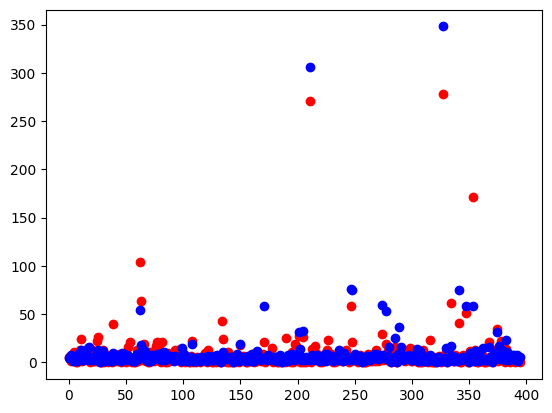

In [261]:
plt.scatter(np.array(range(len(y_test))), y_test, color='red')
plt.scatter(np.array(range(len(predicts))), predicts, color='blue')
plt.show()

### Прогноз на январь 2024

In [257]:
model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.2, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [258]:
predictions = model.predict(df_to_predict[['item_id', 'day_of_week', 'discount_applied', 'promo_typeCode', 'price_w_discount']])


In [259]:
predictions_df = pd.DataFrame({'date': df_to_predict['date'],
                               'item_id': df_to_predict['item_id'],
                               'prediction': predictions})

In [264]:
predictions_df.sort_values(by=['item_id', 'date'])

,date,item_id,prediction
0,2024-01-01,11200,301.326080
1,2024-01-02,11200,301.791931
2,2024-01-03,11200,320.775879
3,2024-01-04,11200,324.974152
4,2024-01-05,11200,17.153873
...,...,...,...
3002,2024-01-27,100691,7.665736
3003,2024-01-28,100691,7.160767
3004,2024-01-29,100691,6.587312
3005,2024-01-30,100691,5.878863


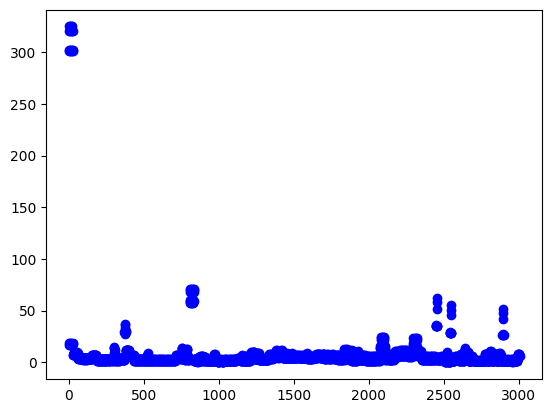

In [269]:
plt.scatter(np.array(range(len(predictions_df.prediction))), predictions_df.prediction, color='blue')
plt.show()

In [268]:
predictions_df.to_csv(r'predictions.csv', sep=';', index=False)